## lib와 데이터 로딩

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 나이와 연봉으로 분석해서, 물건을 구매할지 안할지를 분류하자!!(이진분류)
- 어떤 고객이 구매할 가능성이 높은지 예측
- 고객 세분화 : 나이, 성별, 연봉에 따른 구매 패턴 분석
- 마케팅 타겟팅 : 구매 가능성 높은 고객군 식별

## 데이터 수집
- 데이터 : 마케팅/광고 캠페인 반응 데이터
- User ID: 고객 ID
- Gender: 성별 (Male/Female)
- Age: 나이
- EstimatedSalary: 추정 연봉
- Purchased: 구매 여부 (0=구매 안 함, 1=구매함)

In [4]:
data_path = 'datas_ml/Social_Network_Ads.csv'
df = pd.read_csv(data_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# label 또는 y의 컬럼의 value count 확인
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## 데이터 EDA 및 전처리

In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### X, y 데이터로 분할

In [17]:
y = df['Purchased']
y.unique()

array([0, 1])

In [16]:
# X = df.loc[행, 열]
# X = df[['Gender', 'Age', 'EstimatedSalary']]
# X = df.loc[:, ['Gender', 'Age', 'EstimatedSalary']]
X = df.loc[:, 'Gender':'EstimatedSalary']
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [18]:
X['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [22]:
# map()함수 사용
mappingg = {'Male' : 0, 'Female' : 1}
X['Gender'] = X['Gender'].map(mappingg)
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


### Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
# 객체 생성
X_scaler = StandardScaler()
X_scaler

,copy,True
,with_mean,True
,with_std,True


In [28]:
# X_scaler.fit(X)
# X_scaler.fit_transform(X)
# 위의 두 문장을 한꺼번에 실행하는 매서드
X_scaled = X_scaler.fit_transform(X)
X_scaled

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]], shape=(400, 3))

## 학습, 테스트 데이터 분할

In [29]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.25, 
    random_state=2025,
    stratify=y #test_size 0.25 비율로 분할 비율의 기준을 y로 맞춤
)    

In [84]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [85]:
X_test.shape, y_test.shape

((100, 3), (100,))

## 모델 학습 및 평가

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
# 모델객체 생성(빈 깡통 ai)
# 빈 깡통 모델
model_logrc = LogisticRegression()

In [88]:
model_logrc.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [89]:
# 학습
model_logrc.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
# w1x1 + w2x2 +w3x3 ->w를 나타내는 것(기울기)
model_logrc.coef_

array([[-0.30005386,  2.45875817,  1.19128226]])

In [91]:
model_logrc.intercept_

array([-1.14048041])

In [92]:
y_pro = model_logrc.predict_proba(X_test)
y_pro

array([[0.92609309, 0.07390691],
       [0.55105263, 0.44894737],
       [0.00712835, 0.99287165],
       [0.01252995, 0.98747005],
       [0.43910794, 0.56089206],
       [0.9934481 , 0.0065519 ],
       [0.98180094, 0.01819906],
       [0.97077775, 0.02922225],
       [0.00860568, 0.99139432],
       [0.97187043, 0.02812957],
       [0.03098627, 0.96901373],
       [0.99658546, 0.00341454],
       [0.6702583 , 0.3297417 ],
       [0.67467618, 0.32532382],
       [0.99784239, 0.00215761],
       [0.59017042, 0.40982958],
       [0.63877896, 0.36122104],
       [0.99177535, 0.00822465],
       [0.9942453 , 0.0057547 ],
       [0.71283958, 0.28716042],
       [0.03098627, 0.96901373],
       [0.99756829, 0.00243171],
       [0.61781559, 0.38218441],
       [0.3049513 , 0.6950487 ],
       [0.81592557, 0.18407443],
       [0.51383898, 0.48616102],
       [0.7078376 , 0.2921624 ],
       [0.77534376, 0.22465624],
       [0.64324685, 0.35675315],
       [0.92782594, 0.07217406],
       [0.

In [93]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [94]:
# y_pro, y_pred df로 비교하기
y_result = pd.DataFrame(y_pro)
y_result["y_pred"] = y_pred

In [95]:
y_result.head()

,0,1,y_pred
0,0.926093,0.073907,0
1,0.551053,0.448947,0
2,0.007128,0.992872,1
3,0.012530,0.987470,1
4,0.439108,0.560892,1


### 모델 테스트

In [96]:
y_pred = model_logrc.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

### 모델 평가하기
- 지도학습은 기본적으로 정확도를 확인함

### 정확도(accuracy)

In [97]:
# 정확도
(y_test == y_pred).sum() / len(y_test)

np.float64(0.83)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83

## Confusion Matrix

In [117]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(실제값, 예측값)
cm = confusion_matrix(y_test, y_pred)

### 정밀도(precion), 재현율(적중율, recall)

In [118]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report

In [119]:
# 재현율
recall_score(y_test, y_pred)

0.6666666666666666

In [120]:
# 정밀도
precision_score(y_test, y_pred)

0.8275862068965517

In [121]:
# ML의 분류문제 종합 평가 함수
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.83      0.67      0.74        36

    accuracy                           0.83       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.83      0.83      0.83       100



## 모델 결과를 보고 전략을 짠다

In [122]:
import seaborn as sb

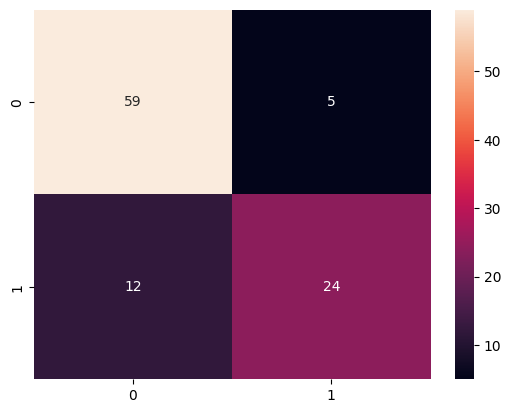

In [123]:
sb.heatmap(data=cm, annot=True)
plt.show()

## 분류 결과 시각화하기

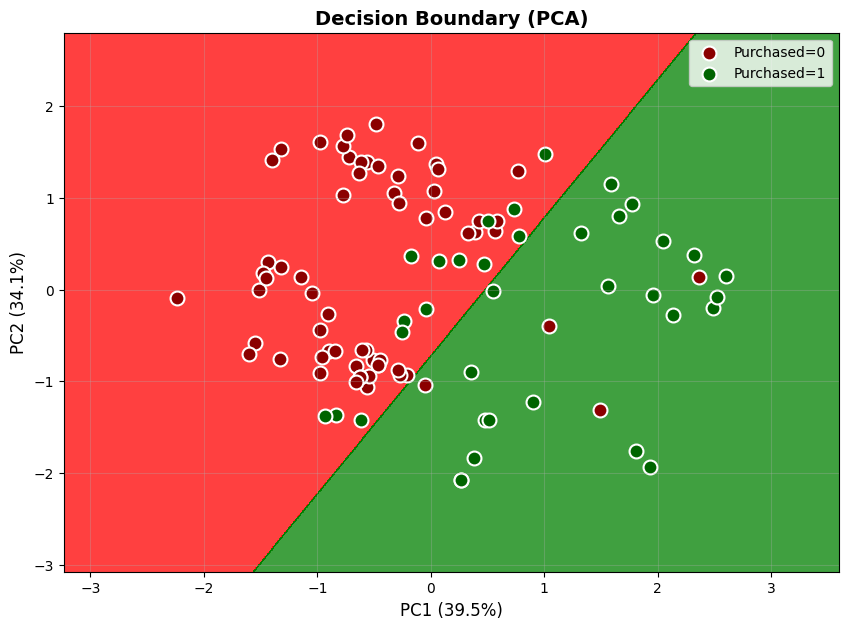

In [124]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 3D → 2D 차원 축소
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# 2D meshgrid
X1, X2 = np.meshgrid(
    np.arange(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 0.01),
    np.arange(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 0.01)
)

# 원래 3D 공간으로 역변환 후 예측
X_grid_2d = np.c_[X1.ravel(), X2.ravel()]
X_grid_3d = pca.inverse_transform(X_grid_2d)
predictions = classifier.predict(X_grid_3d).reshape(X1.shape)

# 시각화
plt.figure(figsize=(10, 7))
plt.contourf(X1, X2, predictions,
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate([0, 1]):
    plt.scatter(X_test_2d[y_test == j, 0], 
               X_test_2d[y_test == j, 1],
               c='darkred' if j == 0 else 'darkgreen',
               label=f'Purchased={j}',
               edgecolors='white',
               s=100,
               linewidth=1.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('Decision Boundary (PCA)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()